# Crawling 

## 학습목표
- 데이터 수집 (Crawling) 방법에 대해서 알 수 있다.
- 웹페이지의 구조에 대해서 알 수 있다.
- 컴퓨터를 통해 웹페이지의 정보를 주고 받을 수 있다. (request)

### 통신의 기초 : 요청, 응답
- Client : 페이지의 정보를 요청(request)하는 pc (사용자의 컴퓨터)
- Server : 페이지의 정보를 응답(response)하는 pc (페이지의 정보를 제공하는 컴퓨터)

### Request 라이브러리
- 웹페이지의 정보, 데이터를 요청/ 응답받기 위한 라이브러리
- 웹브라우저의 역할을 대신(why? 우리는 코드를 통해서 데이터를 받아오기 때문)

In [3]:
import requests as req

- requests 라이브러리 통해 페이지 정보 받아오기
- url : 웹페이지 표준주소 -> 문자열로 작성

In [5]:
url = "https://www.naver.com/"
res = req.get(url)

```
<Response [200]>
```
- 성공! 페이지의 정보를 입력받아 응답완료
- <Response [400]> : 클라이언트상의 문제발생 (request 상의 문제)
- <Response [500]> : 서버상의 문제발생 (response 상의 문제)

In [21]:
# 페이지의 정보(요소) 확인하기
res.text

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

- 태그정보를 통해 컴퓨터와 소통하여 원하는 정보를 추출
- 현재 받아온 정보는 `문자열`형태로 가져옴 > `html` 언어형태로 변경하는 과정 필요

#### 우리가 확인해야할 문제
- res.text -> 결과 -> 데이터타입 : "문자열" -> html 태그화
- 변환작업(parsing)
- beautifulsoup 라이브러리 활용하여 응답받은 문자열은 html 형태로 변환

In [18]:
from bs4 import BeautifulSoup as bs

- 사용법 :
```
bs(변경할 데이터, parsing 방법)
```

In [19]:
!pip install lxml

In [25]:
soup = bs(res.text, 'lxml')

In [26]:
soup

<!DOCTYPE html>
<html class="fzoom" lang="ko"> <head> <meta charset="utf-8"/> <meta content="origin" name="Referrer"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <title>NAVER</title> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양

- 실습
  - 네이버 페이지에서 "동명동 맛집" 검색 후에 페이지 정보 받아오기
  - html 형태로 변경하여 준비 (변수명에 2 붙여서 사용)


<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="strict-origin-when-cross-origin" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="동명동 맛집 : 네이버 검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'동명동 맛집'의 네이버 검색 결과입니다." property="og:description"/> <meta content="'동명동 맛집'의 네이버 검색 결과입니다." lang="ko" name="description"/> <title>동명동 맛집 : 네이버 검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_260108a.css?o=search" rel="stylesheet" type="text/css"/> 
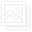
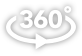
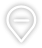
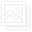
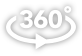
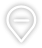

In [28]:
url2 = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%8F%99%EB%AA%85%EB%8F%99+%EB%A7%9B%EC%A7%91&ackey=p9xq0vwg"
res2 = req.get(url2)
soup2 = bs(res2.text,'lxml')
soup2

- soup2 가 가지고 있는 페이지 정보에서 "블로그" 키워드 추출
  - `태그 정보`를 전달해줘야 함!
  - 사용법
    ```
    soup2.select("태그정보")
    ```

In [40]:
soup2.select("a")

[<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>,
 <a href="#content"><span>본문 영역으로 바로가기</span></a>,
 <a class="link" href="https://www.naver.com" onclick="return goOtherCR(this, 'a=sta.naver&amp;r=&amp;i=&amp;u='+urlencode(this.href));"><i class="spnew2 ico_logo">NAVER</i></a>,
 <a aria-pressed="false" class="bt_setkr" href="#" id="ke_kbd_btn" onclick="return tCR('a=sch.ime');" role="button"> <i class="spnew2 ico_keyboard">한글 입력기</i> <div class="guide_text">입력도구</div> </a>,
 <a aria-pressed="false" class="bt_atcp _btn_arw" data-atcmp-element="" href="#" id="nautocomplete" role="button"><i class="spnew2 ico_arrow">자동완성 레이어</i><div class="guide_text">검색 레이어</div></a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.blog.all&amp;sm=tab_jum&amp;query=%EB%8F%99%EB%AA%85%EB%8F%99+%EB%A7%9B%EC%A7%91" onclick="return goOtherCR(this,'a=tab*b.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_blog"></i>블로그</a>,
 <a aria-selected="false" class="tab" href="?s

 - 현재 페이지에 있는 모든 a 태그를 추출 -> 명확한 데이터수집을 위해서 다른 태그들과 구분(제한) > `선택자` 활용
 - 모든 태그를 추출하기 때문에 결과가 "list"형태로 출력

- 아이디 선택자 : #기호로 표시되며 특정한 요소 선택
  - HTML 구조의 공간분할을 적용할 때 (유일한 태그를 적용할 때)
- 클래스 선택자 : .기호로 표시되며 특정한 요소 선택
  - 공통되는 스타일을 적용할 때

In [48]:
# 내가 원하는 데이터만 추출하기 위해서 제한 > 선택자(구분자)
elements = soup2.select("a.tab") # 클래스 이름이 tab인 a태그를 추출

- select : 조건에 해당하는 모든 요소를 추출 -> 리스트 형태로 출력

In [52]:
# 해당하는 모든 태그 > 인덱싱을 통해 원하는 태그를 추출 > 하지만 "블로그"라는 단어만 추출하고 싶음 = contents만 추출하고 싶음
elements[0]

<a aria-selected="false" class="tab" href="?ssc=tab.blog.all&amp;sm=tab_jum&amp;query=%EB%8F%99%EB%AA%85%EB%8F%99+%EB%A7%9B%EC%A7%91" onclick="return goOtherCR(this,'a=tab*b.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_blog"></i>블로그</a>

- 요소 : elements > tag + contents
```
<a> 블로그 </a>

```


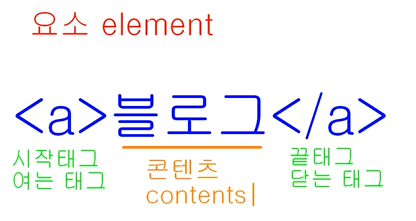



- 요소에서 컨텐츠만 추출하는 방법
```
elements.text
```

In [53]:
# 요소에서 컨텐츠만 추출
elements[0].text

'블로그'

- soup.select('태그정보') > 조건에 해당하는 모든 요소를 추출

- soup.select_one('태그정보') > 조건에 해당하는 요소중 최상단의 요소만 출력 > 요소 형태로 출력, 리스트 형태 아님
  - 인덱싱이 필요하지 않음 > 주로 ID 선택자로 구성되어 있는 요소를 추출할 때 사용

In [56]:
soup2.select_one('a.tab')

<a aria-selected="false" class="tab" href="?ssc=tab.blog.all&amp;sm=tab_jum&amp;query=%EB%8F%99%EB%AA%85%EB%8F%99+%EB%A7%9B%EC%A7%91" onclick="return goOtherCR(this,'a=tab*b.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_blog"></i>블로그</a>

In [57]:
# 인덱싱 불필요 -> 
soup2.select_one('a.tab').text

'블로그'

- 실습2 : "블로그" "카페","이미지","지식in" 모두 출력

In [59]:
a_tab = soup2.select('a.tab')

In [60]:
for text in a_tab:
    print(text.text)

블로그
카페
이미지
지식iN
인플루언서
동영상
쇼핑
뉴스
숏텐츠
어학사전
지도
도서
지식백과
학술정보
전체
블로그
카페
이미지
지식iN
인플루언서
동영상
쇼핑
뉴스
숏텐츠
어학사전
지도
도서
지식백과
학술정보


- 실습3
  - 네이버 날씨 페이지에서 "현재온도 추출하기"

In [72]:
#url
url_3 = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%A0%EC%94%A8&ackey=rjb8wdjm"

In [73]:
#페이지 정보 요청 및 응답
res3 = req.get(url_3)
res3

<Response [200]>

- 데이터가 잘 전달되었는지 확인한 후 변수에 담자

In [74]:
#html 언어로 변경
soup3 = bs(res3.text, 'lxml')
soup3

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="strict-origin-when-cross-origin" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="날씨 : 네이버 검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'날씨'의 네이버 검색 결과입니다." property="og:description"/> <meta content="'날씨'의 네이버 검색 결과입니다." lang="ko" name="description"/> <title>날씨 : 네이버 검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_260108a.css?o=search" rel="stylesheet" type="text/css"/> <link href="http

In [89]:
#현재 온도 데이터 추출 -> 콘텐츠 추출
soup3.select("div.temperature_text>strong")[0].text

'현재 온도2.3°'

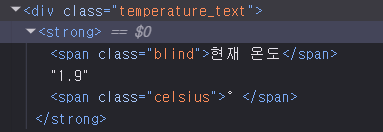

- 현재 temperature_text 클래스를 가진 div 태그중안에 > strong을 자식 태그로 가지는 태그를 가져옴
  - `명확한 클래스이름과 선택자를 가져와야함`
- 현재 strong의 클래스 태그가 없음 > 그래서 부모태그를 활용해서 가져와야
- 인덱싱을 한 다음 text를 가져와야함!

In [92]:
# select_one() > 인덱싱 안해도 되니깐 더 편리함! (현재온도가 가장 상단에 있어서 select_one을 사용해도 결과값이 나옴!)
soup3.select_one("div.temperature_text>strong").text

'현재 온도2.3°'

In [99]:
soup3.select("div.temperature_text>strong")[-1].text

'예측 온도-1°'

- 실습4
  - 네이버 페이지에서 "삼성전자 주식" 키워드 검색 후 뉴스 제목 수집

In [110]:
url4 = "https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&ssc=tab.nx.all&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90+%EC%A3%BC%EC%8B%9D&oquery=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90&tqi=jT2SrsqX5mhsshVW1JR-506173&ackey=8h32gcz9"

In [111]:
res4 = req.get(url4)

In [112]:
soup4 = bs(res4.text,'lxml')

In [122]:
new_title = soup4.select("span.sds-comps-text.sds-comps-text-ellipsis.sds-comps-text-ellipsis-1.sds-comps-text-type-headline1")
new_title

[<span class="sds-comps-text sds-comps-text-ellipsis sds-comps-text-ellipsis-1 sds-comps-text-type-headline1"><mark>삼성전자</mark>, 홍라희 2조 <mark>주식</mark> 처분에 1%대 하락</span>,
 <span class="sds-comps-text sds-comps-text-ellipsis sds-comps-text-ellipsis-1 sds-comps-text-type-headline1">홍라희, <mark>삼성전자 주식</mark> 1천500만주 처분…약 2조원 규모</span>,
 <span class="sds-comps-text sds-comps-text-ellipsis sds-comps-text-ellipsis-1 sds-comps-text-type-headline1">홍라희, <mark>삼성전자 주식</mark> 1500만주 처분…약 2조 원 규모</span>,
 <span class="sds-comps-text sds-comps-text-ellipsis sds-comps-text-ellipsis-1 sds-comps-text-type-headline1">홍라희, <mark>삼성전자 주식</mark> 1,500만주 처분…약 2조원 규모</span>,
 <span class="sds-comps-text sds-comps-text-ellipsis sds-comps-text-ellipsis-1 sds-comps-text-type-headline1 sds-comps-text-weight-sm">경영정보 공시 - <mark>삼성전자</mark></span>,
 <span class="sds-comps-text sds-comps-text-ellipsis sds-comps-text-ellipsis-1 sds-comps-text-type-headline1 sds-comps-text-weight-sm"><mark>삼성전자</mark> - 다음금융</span>

- 비어 있는 클래스 출력 > 띄어쓰기가 되어있음 > 태그명에서는 띄어쓰기를 하면 "자손"선택자로 의미하게 됨.
- 하나의 태그에 여러개의 클래스를 적용할 수 있음!! > 웹페이지상 띄어쓰기 후 작성
  - select 내의 문자열에서는 띄어쓰기가 "자손선택자"를 의미
  - 클래스 이름에 띄어쓰기가 있다면 -> 띄어쓰기를 마침표(.)로 대체하기!

In [124]:
# new_title 내의 콘텐츠 추출
new_title[0].text

'삼성전자, 홍라희 2조 주식 처분에 1%대 하락'

In [125]:
for text in new_title:
    print(text.text)

삼성전자, 홍라희 2조 주식 처분에 1%대 하락
홍라희, 삼성전자 주식 1천500만주 처분…약 2조원 규모
홍라희, 삼성전자 주식 1500만주 처분…약 2조 원 규모
홍라희, 삼성전자 주식 1,500만주 처분…약 2조원 규모
경영정보 공시 - 삼성전자
삼성전자 - 다음금융
삼성전자 주식 1년 뒤에 오늘보다 오른다? 떨어진다?
삼성전자 주가, 성과급과 동탄 집값
삼성전자 주식 2조원 규모 매도하는 이유는(상속세 및 대출금)
이러다 진짜 삼성전자 주식 2배 레버리지 ETF 나오나?
마지막 상속세! 홍라희 관장 삼성전자 주식 1500만 주 매각 완료
홍라희 여사 삼성전자 주식 대량 매도, 주가에 악재일까 기회일까?
[총정리] 삼성전자 홍라희 상속세 논쟁 삼성전자 주식 1,500만 주 처분 상속세 부담이 부른 2조원 매각
삼성전자 - 종목테마 홈
Samsung Electronics Co Ltd 오늘의 주가 | 005930 실시간 티커
삼성전자(005930)의 실시간 주가를 확인해보세요
